# Module 3: Analyzing Election Results and Polls

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install --upgrade us matplotlib seaborn numpy pandas > /dev/null

In [20]:
# Inline Chart Parameters
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 9)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Python Imports
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import us
from utils import download_pres_results
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [21]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Step 1: Download Data
- [Election Results](https://docs.google.com/spreadsheets/d/1D-edaVHTnZNhVU840EPUhz3Cgd7m39Urx7HM8Pq6Pus/edit#gid=29622862)
- Population Estimates By State
- [Polls](https://github.com/fivethirtyeight/data/tree/master/pollster-ratings)
- [Pollster Ratings](https://github.com/fivethirtyeight/data/tree/master/pollster-ratings)
- Census

## Election Results

In [22]:
pres_results_raw = download_pres_results()
pres_results_national = pres_results_raw[pres_results_raw.state == 'Nationwide']
pres_results_by_state = pres_results_raw[~pres_results_raw.state.isin(['Washington DC','Nationwide'])]

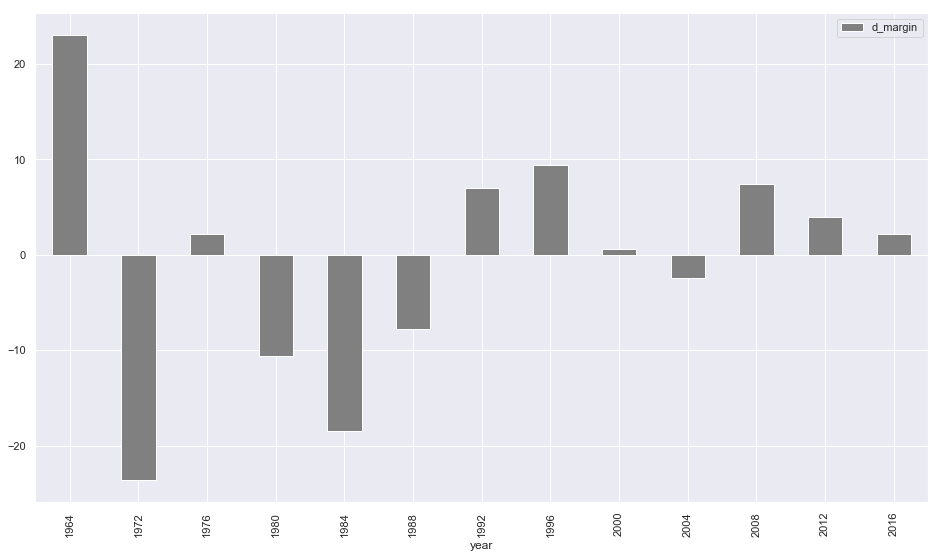

In [23]:
pres_results_national.sort_values(by='year').plot(
    x='year', y='d_margin', kind='bar', color='grey')

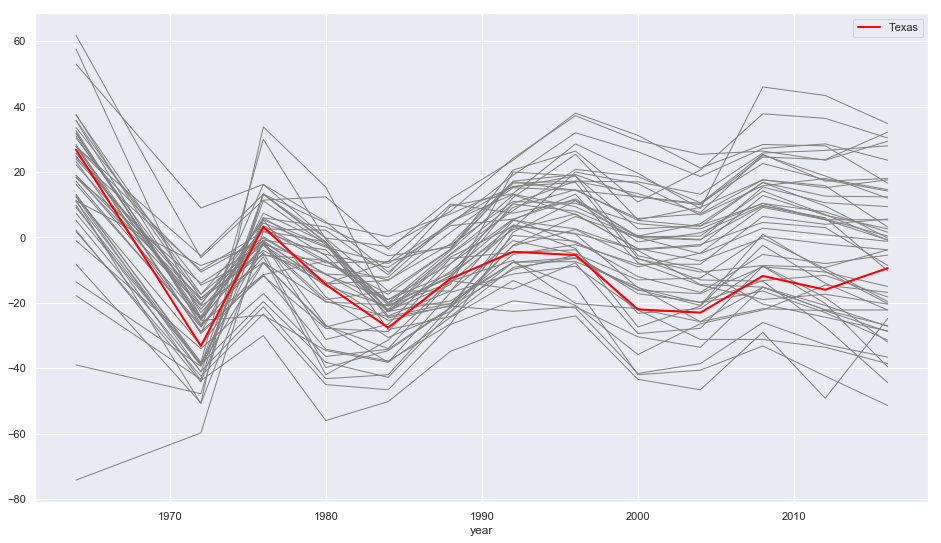

In [24]:
fig, ax = plt.subplots()
pres_results_by_state.groupby('state').plot(
    x='year', y='d_margin', c='grey', kind='line', ax=ax, legend=False, linewidth=1);
pres_results_by_state[pres_results_by_state.state=='Texas'].plot(
    x='year', y='d_margin', c='red', kind='line', ax=ax, label='Texas', linewidth=2)

### Todo
- Calculate PVI
- Plot PVI

## 2016 Presidential Election Results

1. scatterplots with trendlines of election results verus census data a-la
https://fivethirtyeight.com/features/where-trump-got-his-edge/

2. a regression with like 3 or 4 variables
    - education (some college or higher vs not)
    - gender (men vs woman)
    - race (white vs nonwhite %)
    - income

## Polling Data vs Election Results

In [73]:
polls = pd.read_csv('raw-polls.csv')
polls['flip_bias'] = -pres_polls_by_state.bias
pollster_ratings = pd.read_csv('pollster-ratings.csv')
pres_polls_national = polls[(polls.type_detail=='Pres-G') & (polls.location == 'US')]
pres_polls_by_state = polls[(polls.type_detail=='Pres-G') & (polls.location != 'US')]

In [66]:
pres_results_national[pres_results_national.year>=2000].sort_values(by='year')

,DEM,REP,PVI,year,state,d_margin
1,50.299999,49.700001,Even,2000,Nationwide,0.599998
1,48.799999,51.200001,Even,2004,Nationwide,-2.400002
1,53.700001,46.299999,Even,2008,Nationwide,7.400002
1,52.000000,48.000000,Even,2012,Nationwide,4.000000
1,51.099998,48.900002,Even,2016,Nationwide,2.199997


In [74]:
pres_polls_national[['race', 'year', 'cand1_actual', 'cand2_actual']].groupby('race').first().reset_index(drop=True)

,year,cand1_actual,cand2_actual
0,2000,48.38,47.87
1,2004,48.27,50.73
2,2008,52.92,45.66
3,2012,51.01,47.15
4,2016,48.02,45.93


In [75]:
pres_polls_national.columns

Index(['pollno', 'race', 'year', 'location', 'type_simple', 'type_detail',
       'pollster', 'partisan', 'polldate', 'samplesize', 'cand1_name',
       'cand1_pct', 'cand2_name', 'cand2_pct', 'cand3_pct', 'margin_poll',
       'electiondate', 'cand1_actual', 'cand2_actual', 'margin_actual',
       'error', 'bias', 'rightcall', 'comment', 'flip_bias'],
      dtype='object')

#### nationwide popular vote: polls versus election results for each year


- plot
- look @ average error in table

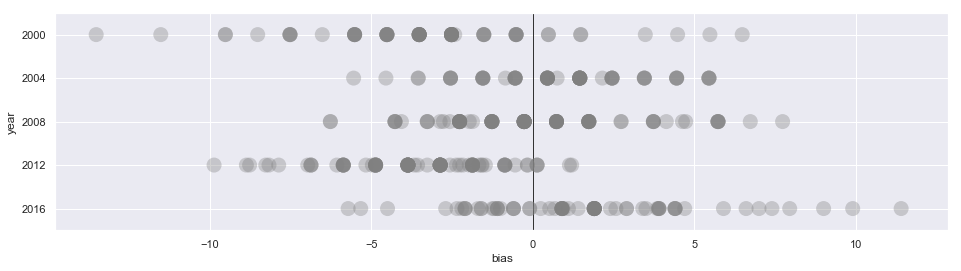

In [76]:
fig, ax = plt.subplots(figsize=(16,4))
sns.stripplot(data=pres_polls_national,
                   x='bias', y='year', orient='h', size=15,
                   jitter=False, alpha=.35, color='grey', ax=ax)
plt.axvline(x=0, color='black', linewidth=0.8)
ax.xaxis.grid(True)
ax.yaxis.grid(True)

In [77]:
pres_polls_national[['year', 'bias']].groupby('year').mean()

,bias
year,
2000,-3.274062
2004,0.855000
2008,0.082857
2012,-3.513837
2016,1.618472


#### state by state polls vs popular vote for 2016

- plot
- look @ average error in table

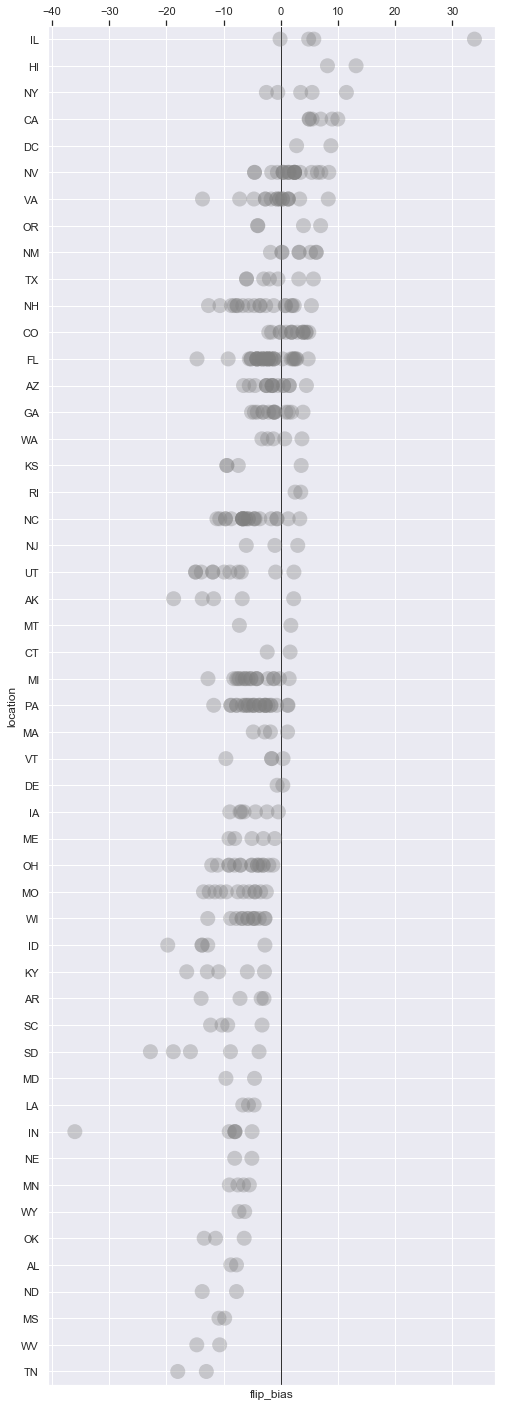

In [39]:
fig, ax = plt.subplots(figsize=(8,25))
sns.stripplot(data=pres_polls_by_state[pres_polls_by_state.year == 2016].sort_values(by='flip_bias', ascending=False),
                   x='flip_bias', y='location', orient='h', size=15,
                   jitter=False, alpha=.35, color='grey', ax=ax,)
plt.axvline(x=0, color='black', linewidth=0.8)
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.xaxis.tick_top()

#### state by state average errors for each year


- plot
- look @ average error in table

In [11]:
pres_results_national.head()

,DEM,REP,PVI,year,state,d_margin
1,51.099998,48.900002,Even,2016,Nationwide,2.199997
1,52.000000,48.000000,Even,2012,Nationwide,4.000000
1,53.700001,46.299999,Even,2008,Nationwide,7.400002
1,48.799999,51.200001,Even,2004,Nationwide,-2.400002
1,50.299999,49.700001,Even,2000,Nationwide,0.599998


#### Step 2: Polling averages and adjustment

* state by state 2016 polls
    1. plot (x axis = state - plot each poll, average of polls, and election result)
    2. plot (x axis = state - plot each *adjusted* poll, *adjusted* average of polls, and election result)
    3. plot (x axis = state - plot average, adjusted average, and election result
* do the last chart with national 2016 as well as national for all years

*Presidential Polls*

Exercise 1: Particular Polls vs Average of the Polls (2016 only, then all)

Exercise 2: Adjusted Average of the Polls (2016 only, then all)

Exercise 3: Average polling error in 2016 (compared to past years)


In [12]:
# def state_to_abbrev(state):
#     return us.states.lookup(state).abbr

# pres_results_national = pres_results_raw[pres_results_raw.state == 'Nationwide']
# pres_polls_national = polls[(polls.type_detail=='Pres-G') & (polls.location == 'US')]

In [13]:
# pres_results = pres_results_raw[~pres_results_raw.state.isin(['Washington DC','Nationwide'])]
# pres_results['state_abbrev'] = pres_results.state.apply(state_to_abbrev)
# pres_results['race'] =  pres_results.year.astype('str') + '_Pres-G_' + pres_results.state_abbrev
# pres_results.head()

## Answering Questions with Data

Lets prove or disprove some hypotheses
- As goes Ohio, so goes the nation.
- Texas is going blue
- ...come up with a few more